In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
#@title Run this to import tha required packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# plt.style.available
plt.style.use("seaborn-darkgrid")
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

In [5]:
from zipfile import ZipFile
file_name = 'data.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


# **Data Analysis**

In [6]:
#@title Preprocessing stuff
"""
Reading data | As general as possible
This obviously has to be changed and the data needs to be read from the
the database of choice.
"""
path =  ''
list_of_companies = []
for paths,subdir,files in os.walk(path+'data'):
  list_of_companies = files

"""
Each coompany is saved in a pandas dataframe in with the format
'df_[company's name]' (e.g. df_AAPL)
"""
companies = []
for company in list_of_companies:
  locals()["df_"+str(company.replace('.csv', ''))] = pd.read_csv(path+'data/'+company, sep = ',')
  locals()["df_"+str(company.replace('.csv', ''))].columns = map(str.lower, locals()["df_"+str(company.replace('.csv', ''))].columns)
  companies.append(company.replace('.csv', ''))

----------------------Your Data For BA Company----------------------



,date,open,high,low,volume,close
0,2013-08-26,97.129894,97.837125,96.633910,2480400,96.927826
1,2013-08-27,95.889940,96.569617,94.659165,4376900,94.796939
2,2013-08-28,94.695904,95.357216,94.209109,2816300,94.852046
3,2013-08-29,94.861233,96.845166,94.604058,3095400,96.376736
4,2013-08-30,96.367549,96.404289,95.155147,2723800,95.449063



----------------------Description For BA Company----------------------



,open,high,low,volume,close
count,828.000000,828.000000,828.000000,8.280000e+02,828.000000
mean,127.212057,128.263044,126.165012,4.233021e+06,127.259770
std,10.799223,10.844433,10.824445,2.284987e+06,10.832515
min,94.695904,95.357216,94.209109,9.623000e+05,94.796939
25%,119.453063,120.401847,118.541474,2.964650e+06,119.443778
50%,126.507537,127.611973,125.389529,3.748800e+06,126.435792
75%,135.590518,136.746843,134.338674,4.793075e+06,135.493055
max,153.240005,153.750000,151.850006,3.373560e+07,152.389999



----------------------Plots For BA Company----------------------



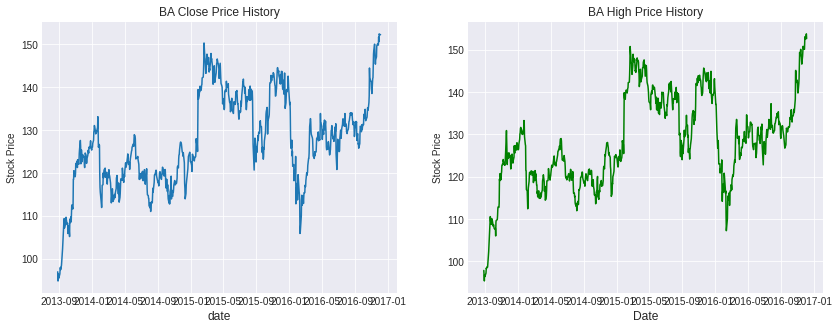

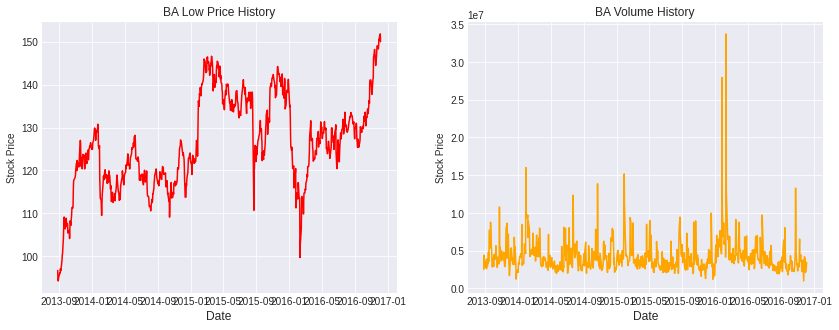


----------------------Daily Returns For BA Company----------------------



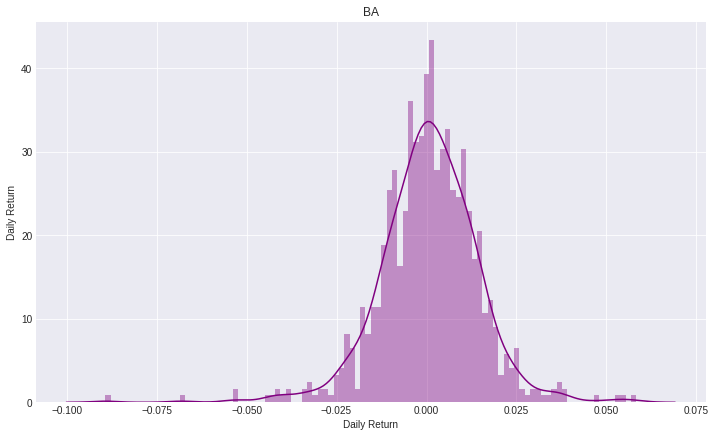

In [7]:
#@title Select one of the companies to perform data analysis.
company_name = "BA" #@param ['AAPL','GDX','IWM','QQQ','SPY','FB','MCD','WMT','IBM','AXP','DIS','BA','CAT','CSCO','CVX','KO','DD','XOM','GE','GS','HD','INTC','JNJ','JPM','MMM','MRK','MSFT','NKE','PFE','PG','TRV','UNH','UTX','V','VZ','DIA']

print(f"----------------------Your Data For {company_name} Company----------------------\n")
df_company=locals()['df_'+company_name]
display(df_company.head())

print(f"\n----------------------Description For {company_name} Company----------------------\n")
display(df_company.describe())

print(f"\n----------------------Plots For {company_name} Company----------------------\n")
df_company.loc[:, 'date'] = pd.to_datetime(df_company.loc[:,'date'], format="%Y/%m/%d")
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(df_company["date"], df_company["close"])
ax1.set_xlabel("date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title(f"{company_name} Close Price History")

# Second Subplot
ax2.plot(df_company["date"], df_company["high"], color="green")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title(f"{company_name} High Price History")
plt.show()

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
# Third Subplot
ax1.plot(df_company["date"], df_company["low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title(f"{company_name} Low Price History")

# Fourth Subplot
ax2.plot(df_company["date"], df_company["volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title(f"{company_name} Volume History")
plt.show()

print(f"\n----------------------Daily Returns For {company_name} Company----------------------\n")
"""
This calculates the companies daily return. Which is the difference between 
open price and close price
"""
df_company['Daily Return'] = df_company['close'].pct_change()
plt.figure(figsize=(12, 7))
sns.distplot(df_company['Daily Return'].dropna(), bins=100, color='purple')
plt.ylabel('Daily Return')
plt.title(f'{company_name}')
plt.show()

# **Machine Learning**

In [ ]:
#TBD